In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/titanic-passengers (1).csv",sep=';')
df=df.drop("Cabin",axis=1)
df=df.drop("Ticket",axis=1)
df=df.drop("PassengerId",axis=1)
df["title"]=""
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
title         0
dtype: int64


In [2]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S,
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S,
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S,
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S,
...,...,...,...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,
887,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,7.2292,C,
888,No,3,"Cacic, Miss. Marija",female,30.0,0,0,8.6625,S,
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,7.8958,S,


In [3]:
cleanup={"Survived":{"Yes":1,"No":0},"Sex":{"male":0,"female":1},"Embarked":{0:"S",1:"Q",2:"C"}}
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna('C',inplace=True)
df.replace(cleanup,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,13.0000,S,
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,7.6500,S,
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,7.8542,S,
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,21.0750,S,
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,52.0000,S,
...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,30.0708,C,
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,7.2292,C,
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,8.6625,S,
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,7.8958,S,


<function matplotlib.pyplot.show>

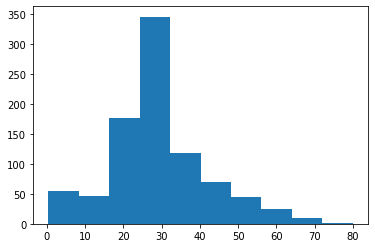

In [4]:
plt.hist(df["Age"])
plt.show

<function matplotlib.pyplot.show>

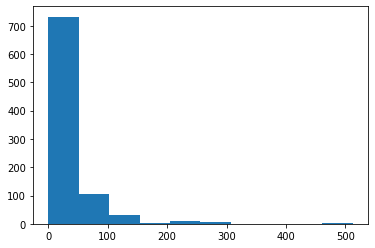

In [5]:
plt.hist(df["Fare"])
plt.show

<function matplotlib.pyplot.show>

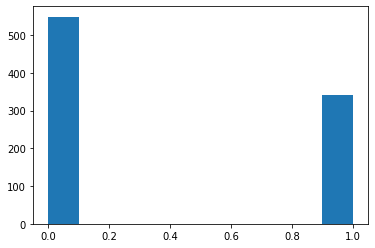

In [6]:
plt.hist(df["Survived"])
plt.show

<function matplotlib.pyplot.show>

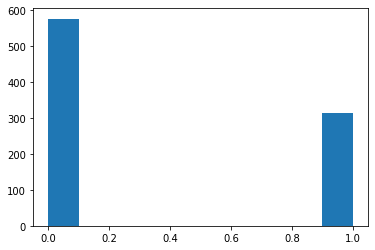

In [7]:
plt.hist(df["Sex"])
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


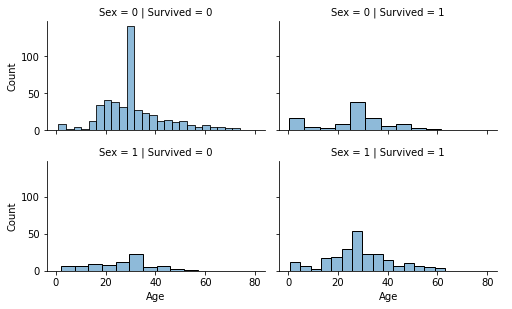

In [8]:
grid = sns.FacetGrid(df, row="Sex", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Age",alpha=.5)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


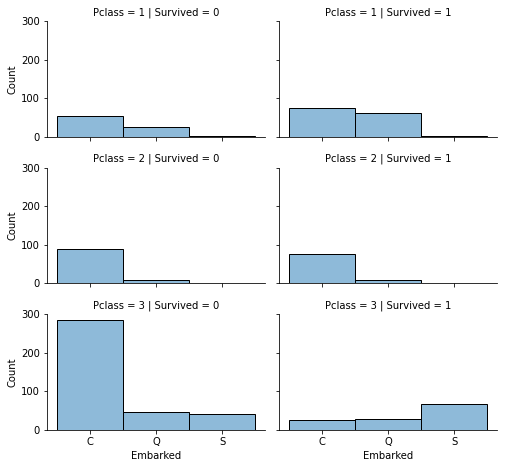

In [9]:
grid = sns.FacetGrid(df, row="Pclass", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Embarked",alpha=.5)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


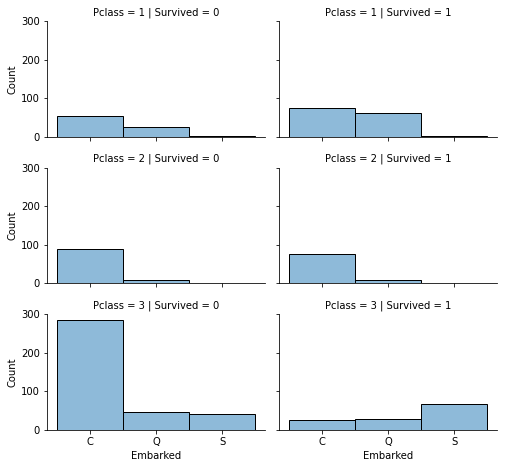

In [10]:
grid = sns.FacetGrid(df, row="Pclass", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Embarked",alpha=.5)
grid.add_legend()

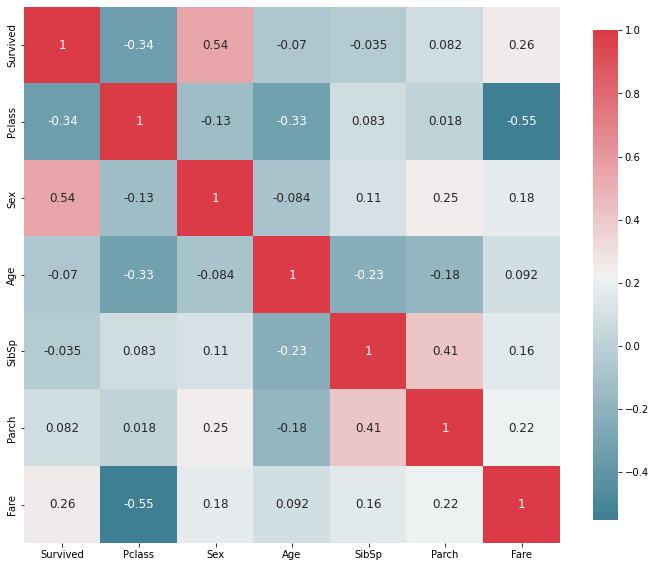

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [12]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
titles= list(df["Name"].str.split(", "))
titles

[['Collander', 'Mr. Erik Gustaf'],
 ['Moen', 'Mr. Sigurd Hansen'],
 ['Jensen', 'Mr. Hans Peder'],
 ['Palsson', 'Mrs. Nils (Alma Cornelia Berglund)'],
 ['Davidson', 'Mr. Thornton'],
 ['Gustafsson', 'Mr. Anders Vilhelm'],
 ['Patchett', 'Mr. George'],
 ['Nakid', 'Miss. Maria ("Mary")'],
 ['Lovell', 'Mr. John Hall ("Henry")'],
 ['Louch', 'Mrs. Charles Alexander (Alice Adelaide Slow)'],
 ['Sobey', 'Mr. Samuel James Hayden'],
 ['Haas', 'Miss. Aloisia'],
 ['Herman', 'Mrs. Samuel (Jane Laver)'],
 ['Chapman', 'Mr. John Henry'],
 ['McMahon', 'Mr. Martin'],
 ['Kallio', 'Mr. Nikolai Erland'],
 ['Widener', 'Mr. Harry Elkins'],
 ['Elias', 'Mr. Joseph Jr'],
 ['Hickman', 'Mr. Lewis'],
 ['Hoyt', 'Mr. Frederick Maxfield'],
 ['McDermott', 'Miss. Brigdet Delia'],
 ['Ekstrom', 'Mr. Johan'],
 ['Beane', 'Mr. Edward'],
 ['Tomlin', 'Mr. Ernest Portage'],
 ['Mellinger', 'Mrs. (Elizabeth Anne Maidment)'],
 ['Milling', 'Mr. Jacob Christian'],
 ['Frolicher-Stehli', 'Mr. Maxmillian'],
 ['Frauenthal', 'Dr. Henry Wil

In [14]:
titles_extracted = []
for i in titles:
  title = i[1].split(". ")
  titles_extracted.append(title[0])
df["Titles"] = titles_extracted
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title,Titles
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,13.0000,S,,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,7.6500,S,,Mr
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,7.8542,S,,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,21.0750,S,,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,52.0000,S,,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,30.0708,C,,Mrs
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,7.2292,C,,Mr
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,8.6625,S,,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,7.8958,S,,Mr


In [15]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
df["Titles"].replace(Title_Dictionary,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title,Titles
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,13.0000,S,,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,7.6500,S,,Mrs
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,7.8542,S,,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,21.0750,S,,Mrs
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,52.0000,S,,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,30.0708,C,,Mrs
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,7.2292,C,,Mrs
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,8.6625,S,,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,7.8958,S,,Mrs


In [16]:
set(df["Titles"])

{'Master', 'Miss', 'Mrs', 'Officer', 'Royalty'}

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


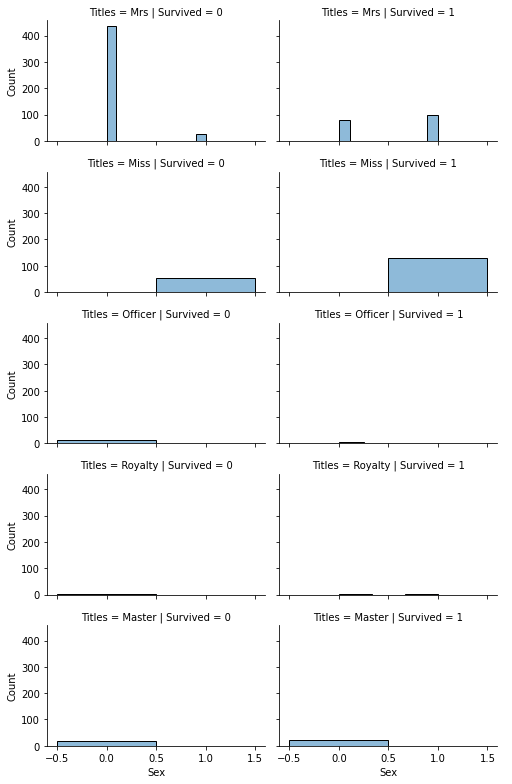

In [17]:
grid = sns.FacetGrid(df, row="Titles", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Sex",alpha=.5)
grid.add_legend()

In [28]:
Family = []
df['Familysize'] = ""
for i in range(0,891):
  n = df["SibSp"][i] + df["Parch"][i]
  Family.append(n)
df['Familysize'] = Family
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title,Titles,Familysize
0,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,13.0000,S,,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,7.6500,S,,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,7.8542,S,,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,21.0750,S,,Mrs,4
4,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,52.0000,S,,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,30.0708,C,,Mrs,1
887,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,7.2292,C,,Mrs,0
888,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,8.6625,S,,Miss,0
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,7.8958,S,,Mrs,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


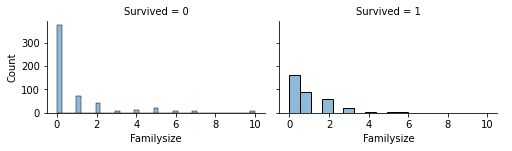

In [31]:
grid = sns.FacetGrid(df, col="Survived" , size=2.2, aspect=1.6)
grid.map(sns.histplot, "Familysize",alpha=.5)
grid.add_legend()